# Ensemble Methods
## Decision Trees
### `DecisionTreeClassifier` 

In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [56]:
iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
data.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
data

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [57]:
X = data.drop(columns=['target']).values
y = data.target.values

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=2, min_samples_split=100, min_samples_leaf=20)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, min_samples_split=100,
                       random_state=2)

In [60]:
# ! pip install graphviz

In [61]:
import graphviz
from sklearn.tree import export_graphviz

In [62]:
# Export graph
export_graphviz(tree_clf, out_file='iris_tree.dot', feature_names=data.drop(columns=['target']).columns, rounded=True, filled=True)

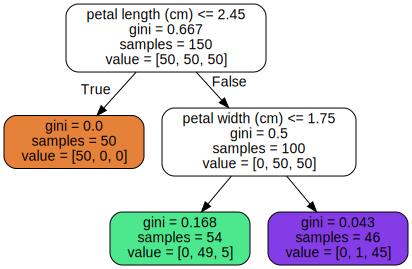

In [63]:
with open('iris_tree.dot') as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph));

1. Feature we are using
2. Gini index (purity). The lower the better
3. Samples. Number of samples in this node.
4. Values number of values in this node for each class. [cl_0, cl_2, cl_3]

#### Gini Index
$$Gini(node) = 1 - \sum{p^2_i}$$

In [64]:
gini_root = 1 - 3 * (50/150) ** 2
gini_root

0.6666666666666667

In [65]:
gini_green = 1 - (49 / 54) ** 2 - (5 / 54) ** 2
gini_green

0.1680384087791495

In [66]:
tree_clf.predict([[4, 1]])


array([1.])

In [67]:
# Probability of belonging to each class.
tree_clf.predict_proba([[4, 1]])

array([[0.        , 0.90740741, 0.09259259]])

In [68]:
pd.DataFrame({'feature_importance': tree_clf.feature_importances_, 'columns': data.drop(columns=['target']).columns })

,feature_importance,columns
0,0.561991,petal length (cm)
1,0.438009,petal width (cm)


In [43]:
from mlxtend.plotting import plot_decision_regions

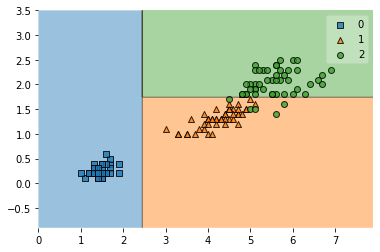

In [31]:
plot_decision_regions(X, iris.target, clf=tree_clf);

## Variance illustrated

In [40]:
import pandas as pd
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/flats.csv')
data.head(3)

,price,bedrooms,surface,floors
0,274.0,3,1830,2.0
1,500.0,4,2120,1.0
2,320.0,3,1260,1.0


In [41]:
X = data[['bedrooms','surface','floors']]
y = data['price']

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from utils.plots import plot_histogram_cv_results

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, X, y, scoring = "r2", cv=5)

# Custom method
plot_histogram_cv_results(cv_results)

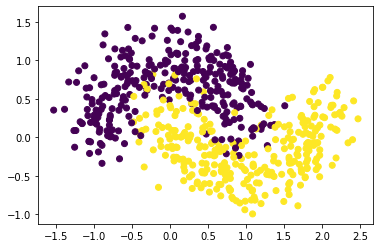

In [48]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

n=600
X_moon,y_moon = make_moons(n_samples=n, noise=0.25, random_state=0)

plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon);

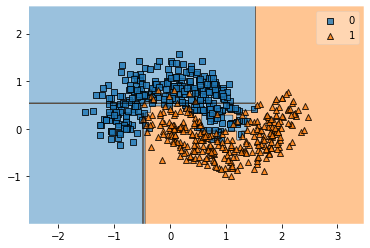

In [50]:
from sklearn.tree import DecisionTreeClassifier
from ipywidgets import interact

#@interact(max_depth=10)
def plot_classifier(max_depth):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_moon, y_moon)
    plot_decision_regions(X_moon, y_moon, clf=clf)

plot_classifier(max_depth=10)

In [72]:
from sklearn.ensemble import RandomForestRegressor
from utils.plots import plot_histogram_cv_results

forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, X, y, scoring = "r2", cv=5)

plot_histogram_cv_results(cv_results)

SyntaxError: invalid syntax (4102245296.py, line 2)

In [73]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)

cv_results = cross_validate(adaboost, X, y, scoring = "r2", cv=5)

plot_histogram_cv_results(cv_results)

NameError: name 'plot_histogram_cv_results' is not defined

## Gradient boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

In [76]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

xgb_reg.fit(X, y,
    # evaluate loss at each iteration
    eval_set=[(X, y), (X[[-1]], y[[-1]])],  
    # stop iterating when eval loss increases 5 times in a row
    early_stopping_rounds=5
)

y_pred = xgb_reg.predict(X[-1])

[0]	validation_0-rmse:0.86662	validation_1-rmse:1.35532
[1]	validation_0-rmse:0.78453	validation_1-rmse:1.22620
[2]	validation_0-rmse:0.71062	validation_1-rmse:1.10973
[3]	validation_0-rmse:0.64415	validation_1-rmse:1.00324
[4]	validation_0-rmse:0.58412	validation_1-rmse:0.90520
[5]	validation_0-rmse:0.53006	validation_1-rmse:0.81674
[6]	validation_0-rmse:0.48141	validation_1-rmse:0.73692
[7]	validation_0-rmse:0.43794	validation_1-rmse:0.66780
[8]	validation_0-rmse:0.39816	validation_1-rmse:0.60431
[9]	validation_0-rmse:0.36227	validation_1-rmse:0.54526
[10]	validation_0-rmse:0.33076	validation_1-rmse:0.49413
[11]	validation_0-rmse:0.30160	validation_1-rmse:0.44584
[12]	validation_0-rmse:0.27540	validation_1-rmse:0.40227
[13]	validation_0-rmse:0.25274	validation_1-rmse:0.36445
[14]	validation_0-rmse:0.23157	validation_1-rmse:0.32884
[15]	validation_0-rmse:0.21342	validation_1-rmse:0.29701
[16]	validation_0-rmse:0.19744	validation_1-rmse:0.26910
[17]	validation_0-rmse:0.18236	validation

XGBoostError: [10:18:01] ../src/predictor/cpu_predictor.cc:341: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 2) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) /home/rsole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x21eac9) [0x7fdd5341eac9]
  [bt] (1) /home/rsole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x23657a) [0x7fdd5343657a]
  [bt] (2) /home/rsole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x237989) [0x7fdd53437989]
  [bt] (3) /home/rsole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x18987d) [0x7fdd5338987d]
  [bt] (4) /home/rsole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0x1bf350) [0x7fdd533bf350]
  [bt] (5) /home/rsole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(+0xb5739) [0x7fdd532b5739]
  [bt] (6) /home/rsole/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x28d) [0x7fdd5329b51d]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7fde0dc31e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7fde0dc2e493]



In [ ]:
from sklearn.pipeline import make_pipeline

pipe_xgb = make_pipeline(xgb_reg)
cv_results = cross_validate(pipe_xgb,X,y,cv=10,scoring='r2')

<AxesSubplot:>

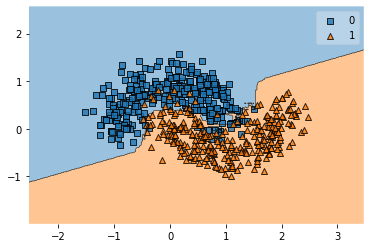

In [80]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
logreg = LogisticRegression()

ensemble = VotingClassifier(
    estimators = [("rf", forest),("lr", logreg)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,1] # to equally weight forest and logreg in the vote
)
ensemble.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, clf=ensemble)

<AxesSubplot:>

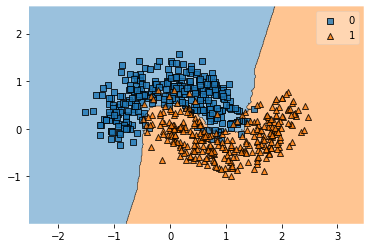

In [82]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier

ensemble = StackingClassifier(
    estimators = [("rf", RandomForestClassifier()),
                  ("knn", KNeighborsClassifier(n_neighbors=10))],
    final_estimator = LogisticRegression())

ensemble.fit(X_moon, y_moon)
plot_decision_regions(X_moon, y_moon, clf=ensemble)